In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [6]:
data = pd.read_csv('../data/diabetes.csv')

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<Figure size 1500x1000 with 0 Axes>

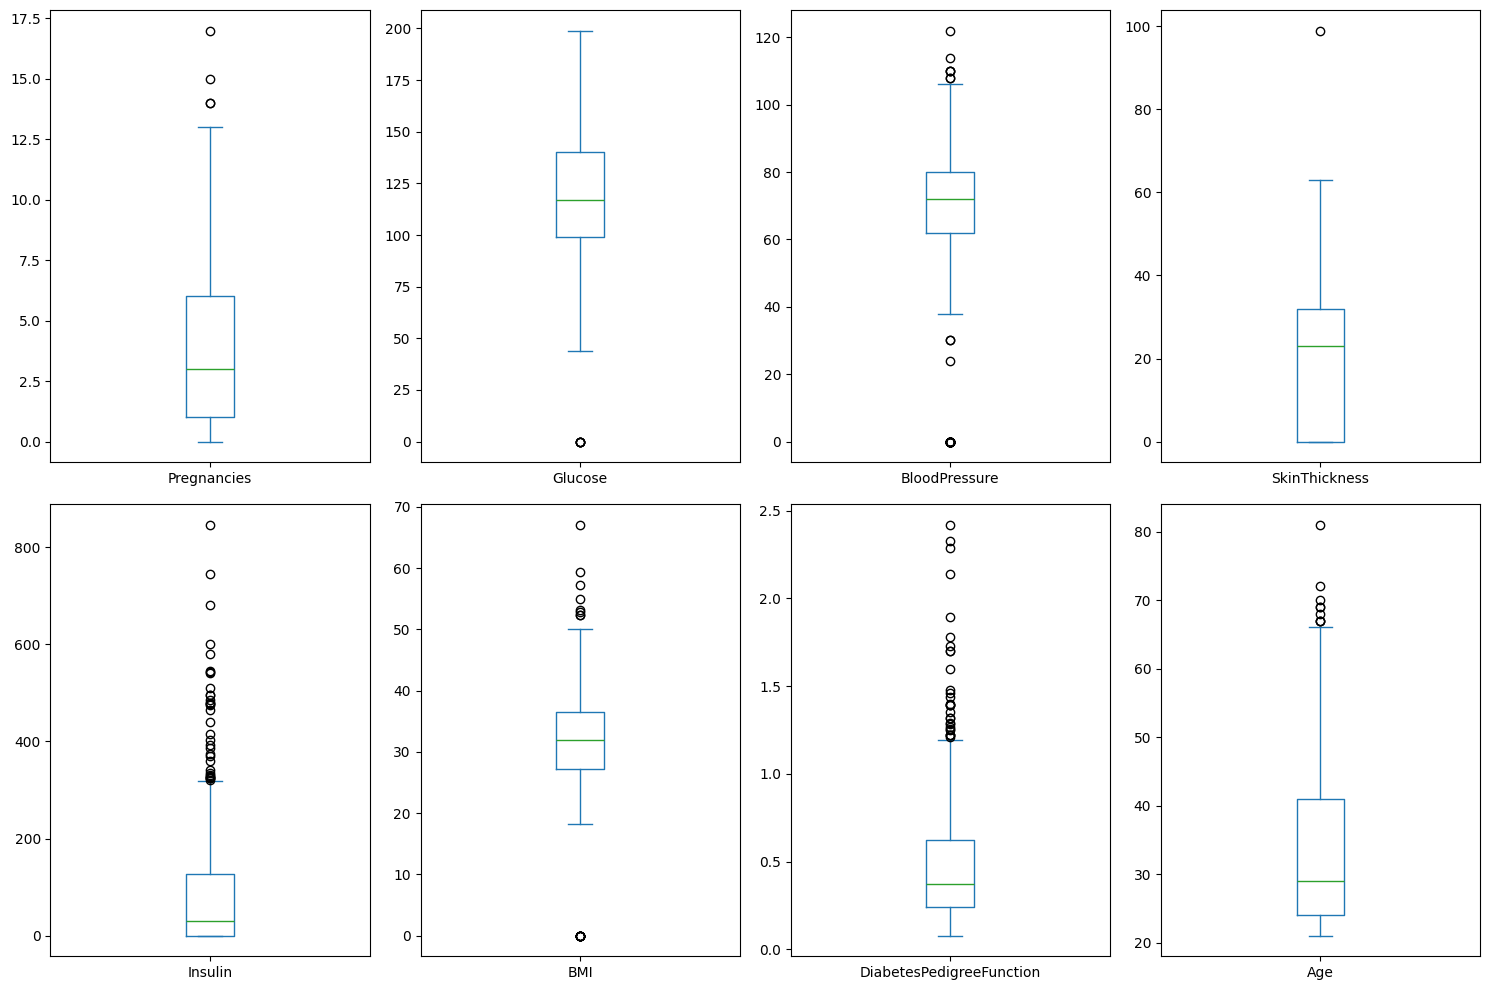

In [12]:
# Configuration des graphiques
plt.figure(figsize=(15, 10))

# Liste des colonnes à visualiser
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Création des boxplots
data[columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10))
plt.tight_layout()
plt.show()

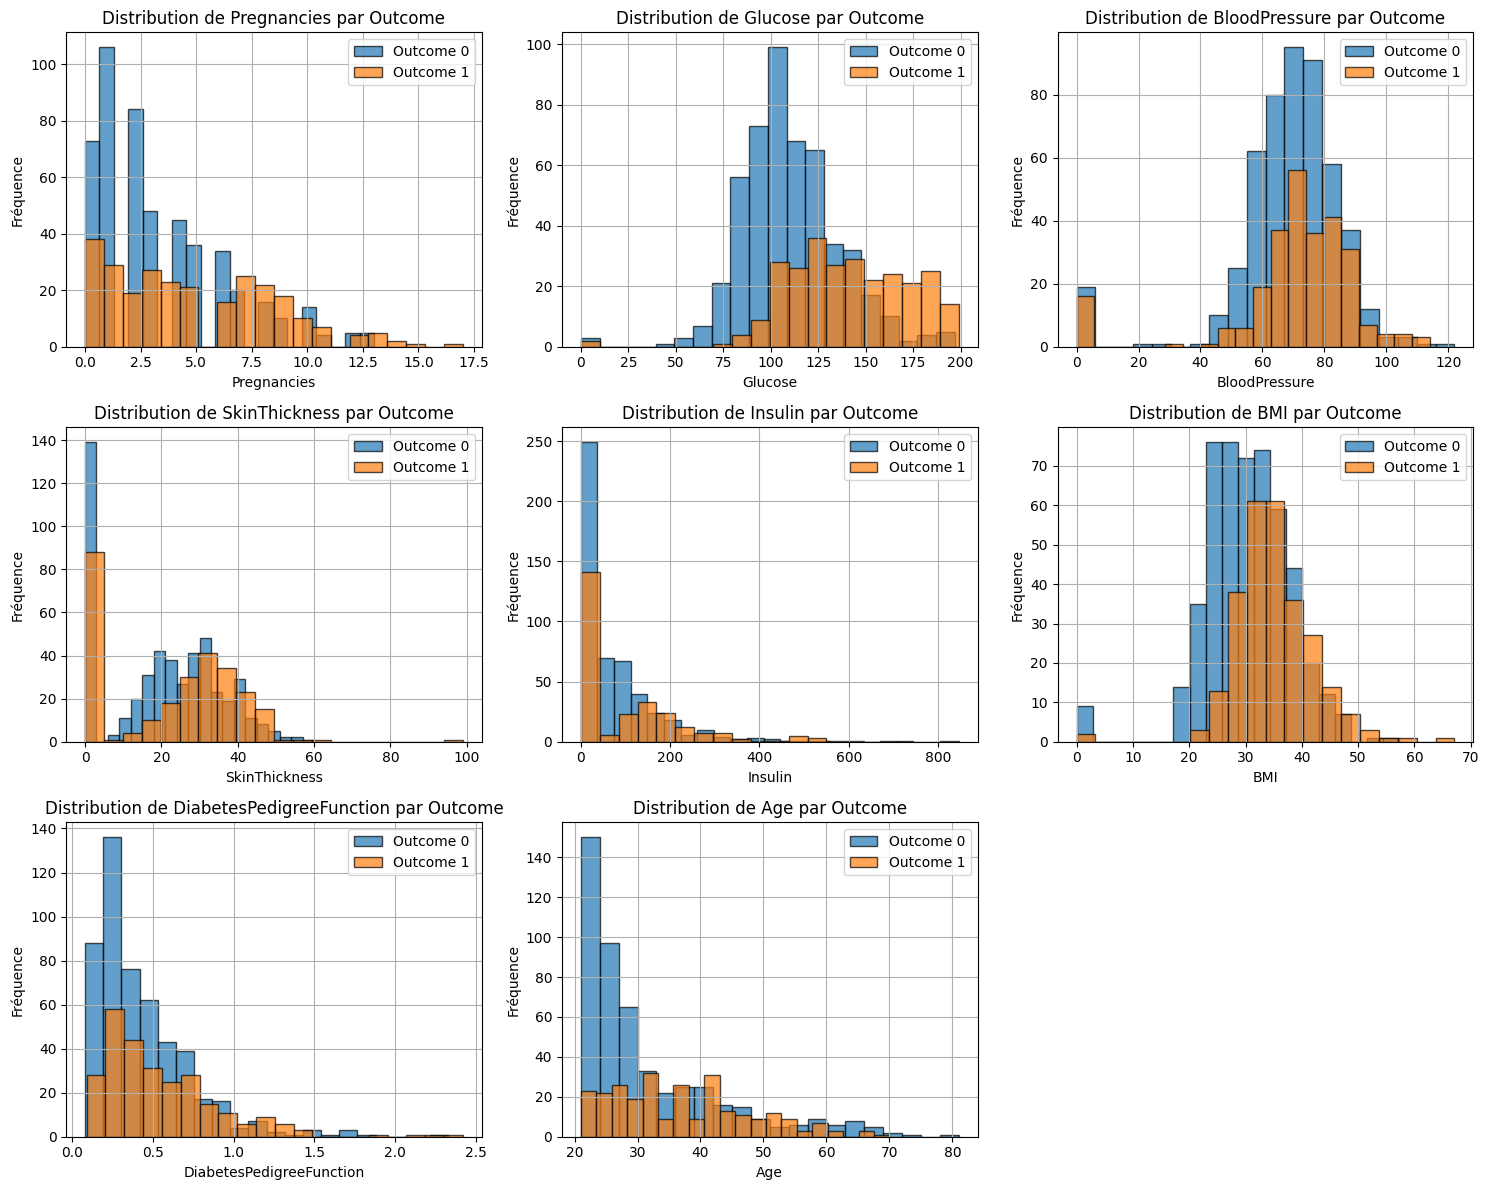

In [13]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    for outcome in [0, 1]:
        data[data['Outcome'] == outcome][col].hist(bins=20, alpha=0.7, edgecolor='black', label=f'Outcome {outcome}')
    plt.title(f'Distribution de {col} par Outcome')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

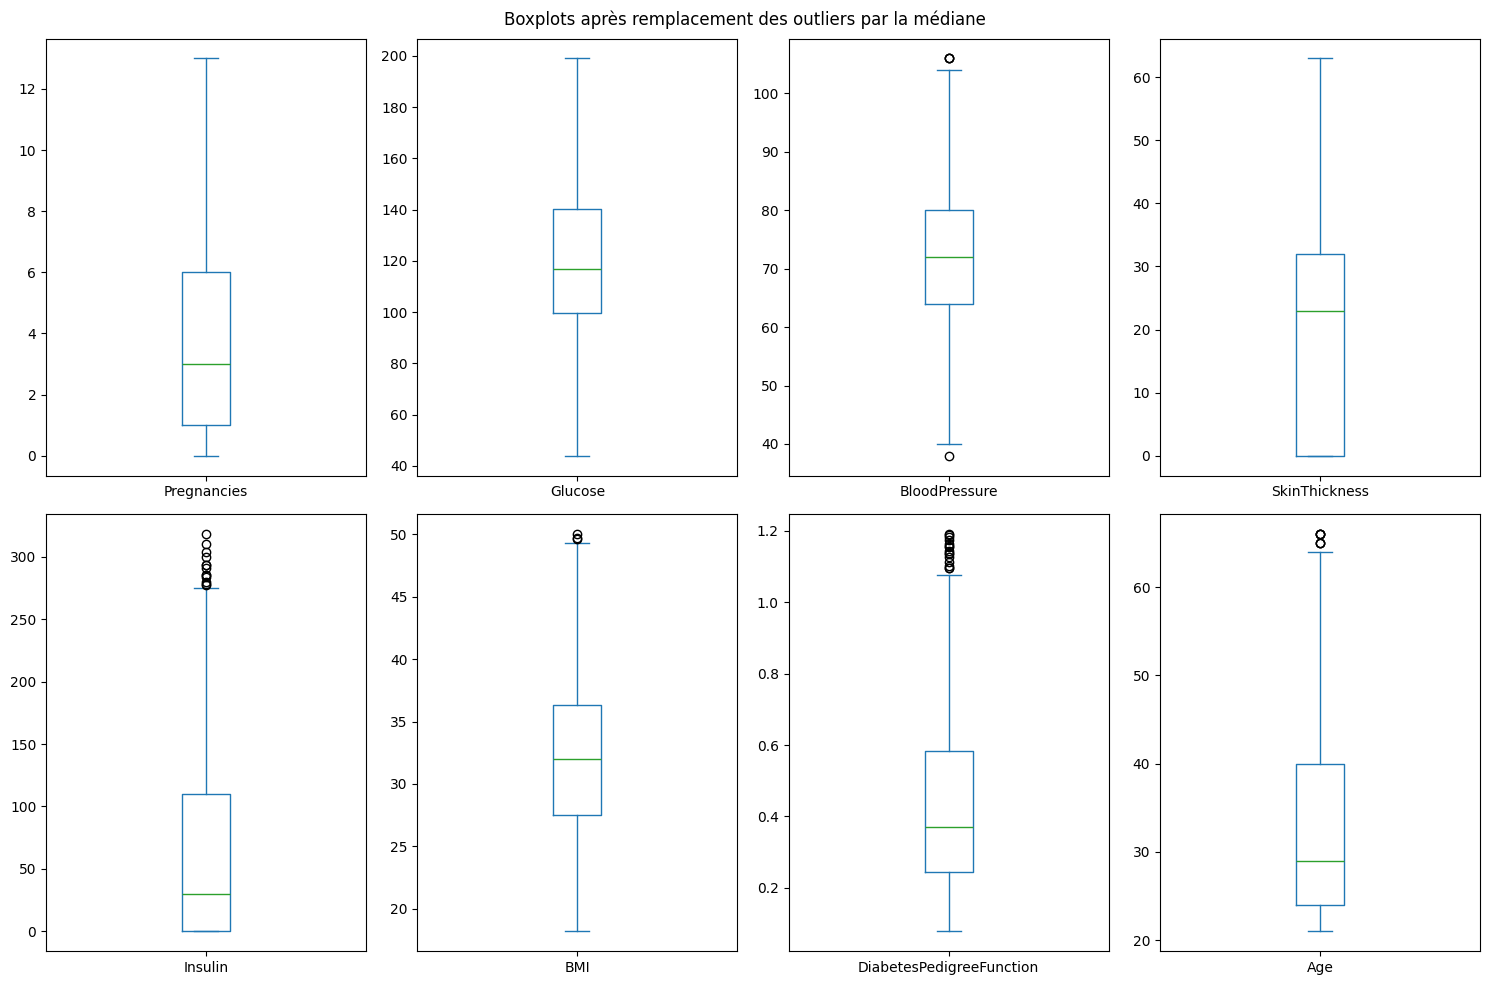

In [14]:
# Remplacer les outliers par la médiane
for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[col].median()
    
    # Remplacer les valeurs en dehors des bornes par la médiane
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])

# Tracer les boxplots après traitement
plt.figure(figsize=(15, 10))
data[columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10))
plt.suptitle("Boxplots après remplacement des outliers par la médiane")
plt.tight_layout()
plt.show()

In [15]:
# Séparation des features (X) et de la target (y)
X = data.drop('Outcome', axis=1)  # Toutes les colonnes sauf Outcome
y = data['Outcome']  # Juste la colonne Outcome

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


=== Random Forest ===
Accuracy: 0.7446


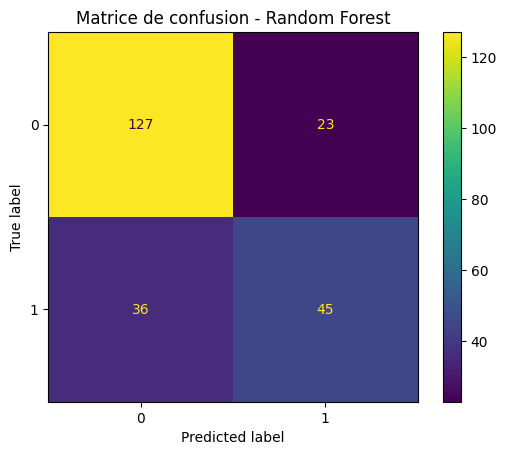


=== SVM ===
Accuracy: 0.7403


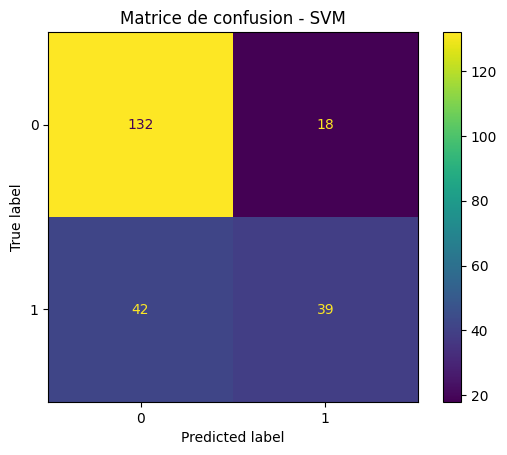


=== Logistic Regression ===
Accuracy: 0.7316


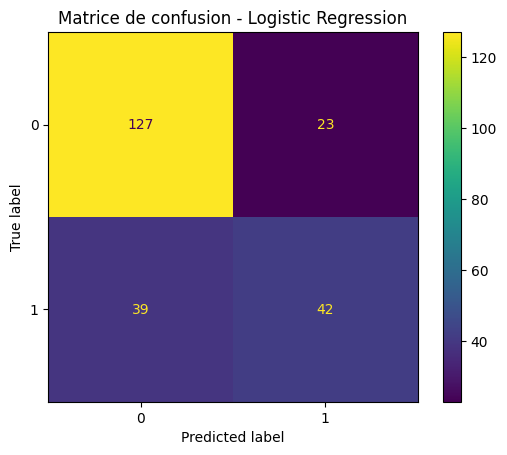

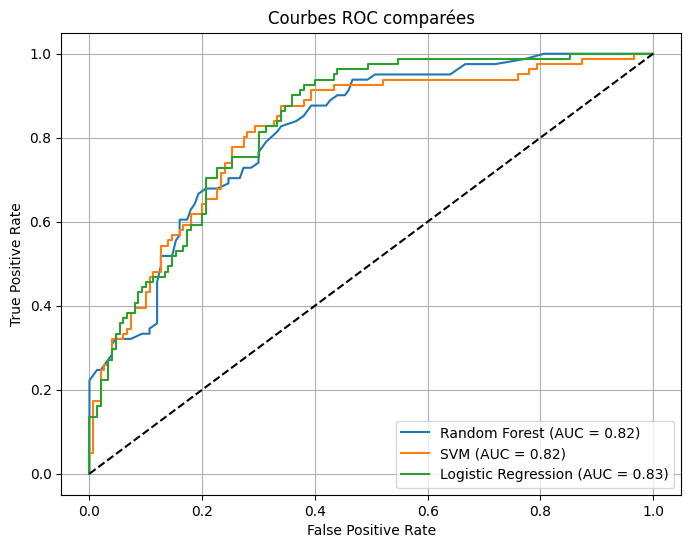

In [16]:
# Initialisation des modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),  # `probability=True` pour la courbe ROC
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Dictionnaires pour stocker les résultats
accuracies = {}
roc_curves = {}

# Entraînement + évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matrice de confusion - {name}")
    plt.show()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)

# Tracer toutes les courbes ROC
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC comparées')
plt.legend()
plt.grid()
plt.show()

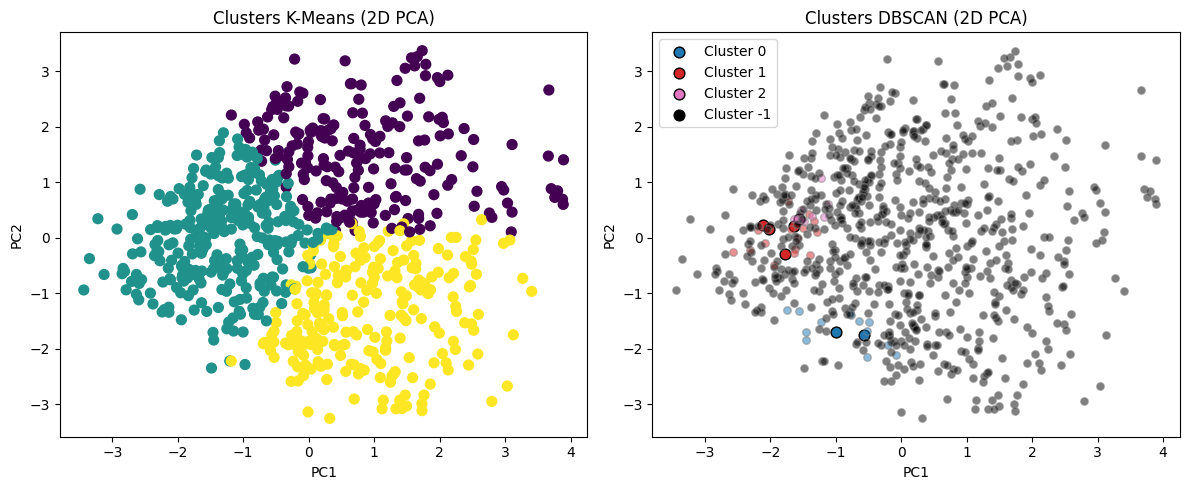

In [17]:
# 1. Prétraitement
X_scaled = StandardScaler().fit_transform(X)  # si pas déjà normalisé

# 2. Réduction de dimension (PCA à 2 composantes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 4. DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=8)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 5. Affichage : K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('Clusters K-Means (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# 6. Affichage : DBSCAN
plt.subplot(1, 2, 2)

# Identifier core/border
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(dbscan_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    class_mask = (dbscan_labels == label)
    xy_core = X_pca[class_mask & core_samples_mask]
    xy_border = X_pca[class_mask & ~core_samples_mask]

    # Noise (label = -1)
    if label == -1:
        color = 'k'  # Black for noise

    # Core points
    plt.scatter(xy_core[:, 0], xy_core[:, 1], c=[color], label=f'Cluster {label}', s=60, edgecolors='k')

    # Border points
    plt.scatter(xy_border[:, 0], xy_border[:, 1], c=[color], s=30, edgecolors='gray', alpha=0.5)
"""
Core points: bold circles
Black points  = outliers / noise
Border points: faded smaller circles
"""
plt.title('Clusters DBSCAN (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()